# Pymaceuticals Inc.
---

### Analysis

- Analysis:


In this study, a cohort of 249 mice identified with squamous cell carcinoma (SCC) tumors underwent various treatment regimens, with the primary focus on evaluating the performance of Pymaceuticals' drug of interest, Capomulin, against other treatment options. The experiment spanned 45 days, during which tumor development was meticulously observed and measured. 


Data Cleaning:
The initial dataset contained records for 249 unique mice. However, one mouse ('g989') had duplicated records, leading to the removal of one mouse and resulting in 248 unique mice.

Summary Statistics:
Summary statistics for tumor volume were calculated for each drug regimen, providing insights into the central tendency and variability of the data. For example, Capomulin and Ramicane had lower mean tumor volumes compared to other regimens.

Data Distribution:
A bar plot was generated to visualize the distribution of observed mouse timepoints for each drug regimen. Capomulin and Ramicane had the highest number of data points, indicating more extensive observations.

Treatment Regimens:
The final tumor volume for each mouse under specific treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) was calculated by considering the maximum timepoint for each mouse.

Treatment Efficacy:
A box plot illustrated the distribution of the final tumor volume for mice treated with specific drug regimens. Capomulin and Ramicane showed lower median tumor volumes compared to Infubinol and Ceftamin, suggesting potential efficacy.

Mouse Weight vs. Tumor Volume:
A scatter plot demonstrated the relationship between mouse weight and the average observed tumor volume for mice treated with Capomulin. There appears to be a positive correlation, indicating that heavier mice tend to have larger average tumor volumes.

Correlation Coefficient:
The correlation coefficient between mouse weight and the average tumor volume was calculated and found to be 0.84, suggesting a strong positive correlation.

In conclusion, this study not only meticulously cleaned and analyzed the dataset but also unearthed valuable insights into the performance of different drug regimens. Capomulin and Ramicane exhibited promising results with lower tumor volumes, emphasizing their potential efficacy in SCC tumor treatment. The positive correlation between mouse weight and tumor volume further adds a layer of understanding to potential factors influencing treatment outcomes. This comprehensive analysis contributes to a deeper understanding of the dataset, paving the way for more nuanced interpretations and potential avenues for future research and experimentation.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:\\Users\\Qazi Fabia Hoq\\OneDrive\\Desktop\\matplotlib_challenge\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Qazi Fabia Hoq\\OneDrive\\Desktop\\matplotlib_challenge\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
display(merged_data.head())



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice
num_mice = merged_data['Mouse ID'].nunique()
print(num_mice)



249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(repr(duplicate_mice))


array(['g989'], dtype=object)


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)]
desired_columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
display(duplicate_mouse_data[desired_columns])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mice)].copy()

display(cleaned_data)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(num_mice_cleaned)



248


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
display(summary_statistics)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
display(summary_statistics_advanced)



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

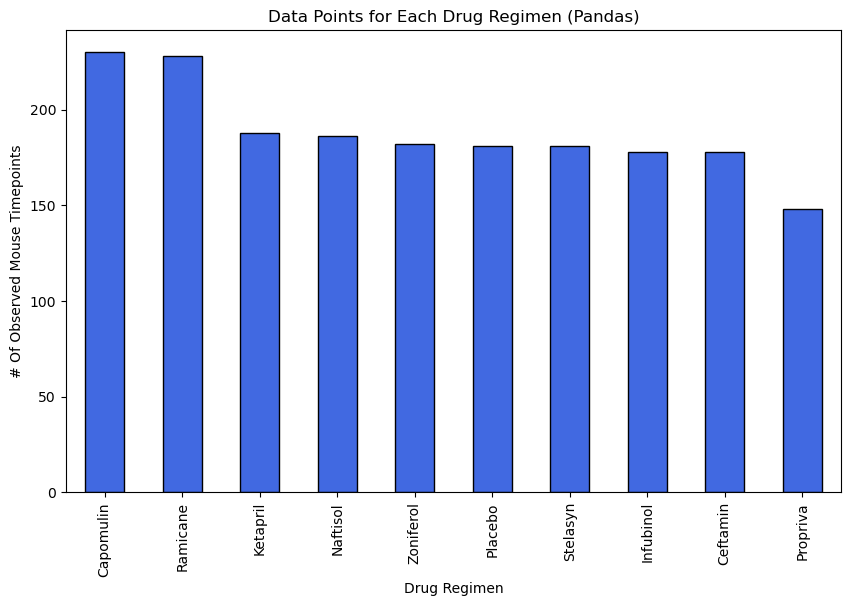

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
ax = regimen_counts.plot(kind='bar', color='royalblue', edgecolor='black', figsize=(10, 6), ylabel='# Of Observed Mouse Timepoints', xlabel='Drug Regimen', title='Data Points for Each Drug Regimen (Pandas)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


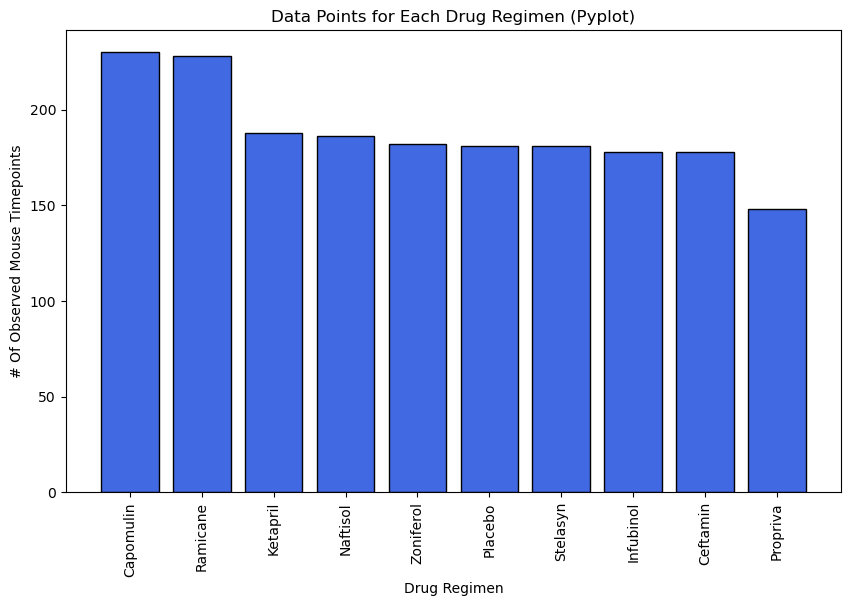

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
import matplotlib.pyplot as plt

regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='royalblue', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.title('Data Points for Each Drug Regimen (Pyplot)')
plt.xticks(rotation=90)
plt.show()


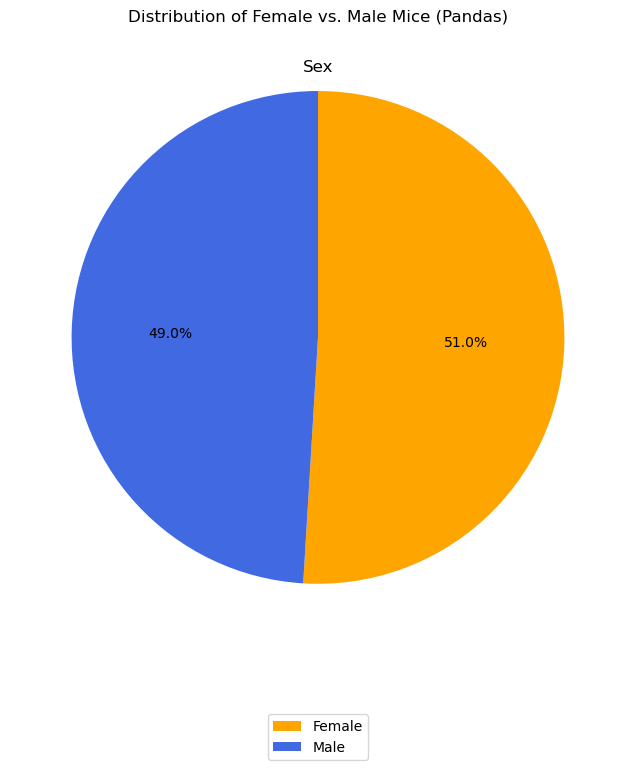

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()
ax = gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'royalblue'], figsize=(8, 8), labels=None, counterclock=False)
ax.set_ylabel('')
ax.legend(labels=['Female', 'Male'], loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax.text(0, 1.1, 'Sex', ha='center', va='center', fontsize=12)
plt.title('Distribution of Female vs. Male Mice (Pandas)')
plt.show()


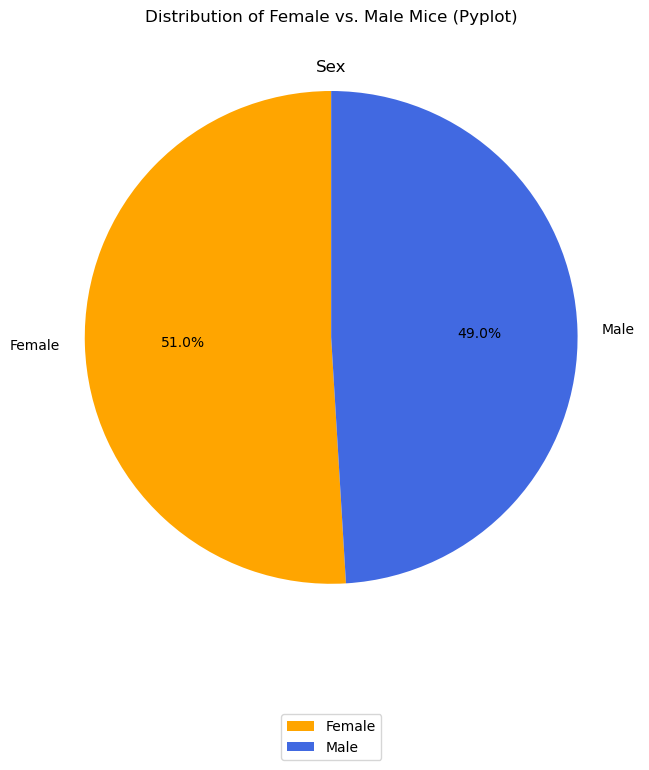

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['orange', 'royalblue'])
plt.legend(labels=['Female', 'Male'], loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.text(0, 1.1, 'Sex', ha='center', va='center', fontsize=12)
plt.title('Distribution of Female vs. Male Mice (Pyplot)')
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(final_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_target_regimens = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(target_regimens)]
display(final_tumor_volume_target_regimens)



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in target_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_target_regimens.loc[final_tumor_volume_target_regimens['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Check for outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    

    print(f"{regimen}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


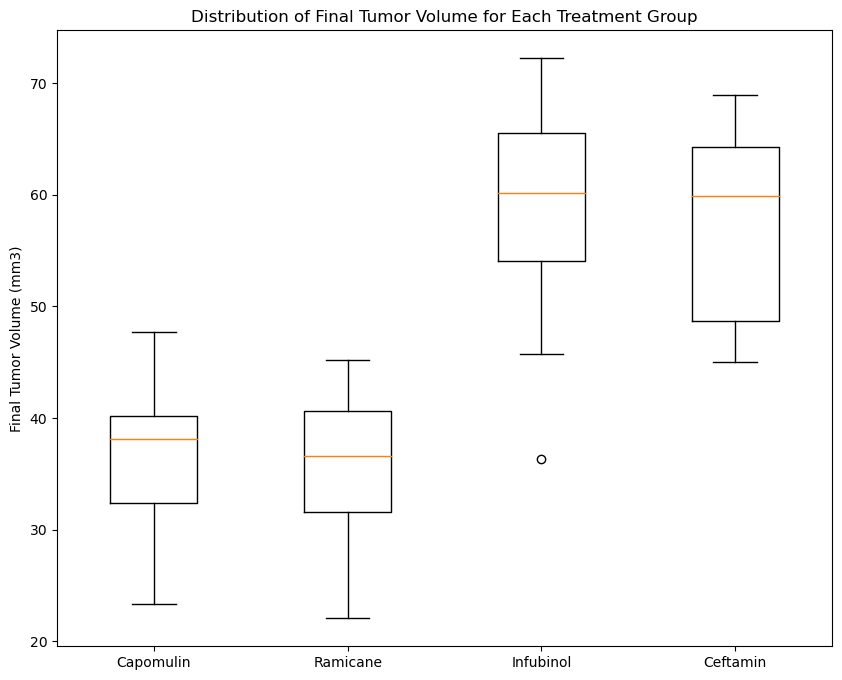

In [55]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(tumor_vol_data, labels=target_regimens)
ax.set_ylabel('Final Tumor Volume (mm3)', rotation=90)
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.show()


## Line and Scatter Plots

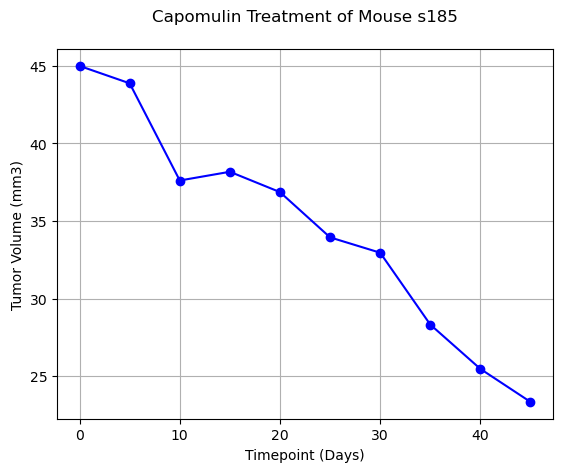

In [60]:


# Generate a line plot of tumor volume vs. time point for the selected mouse

capomulin_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 's185')]

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {capomulin_mouse.iloc[0]["Mouse ID"]}', pad=20)
plt.grid(True)
plt.show()



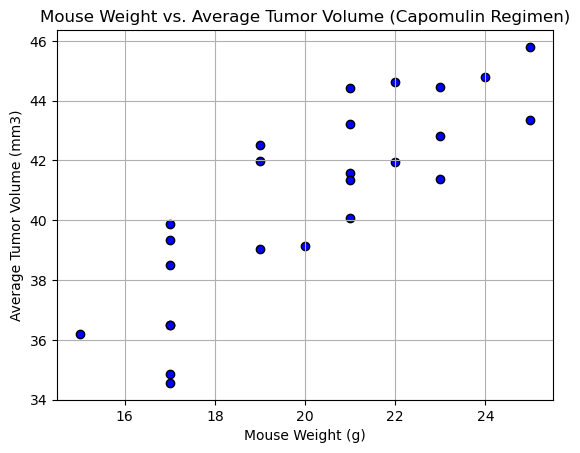

In [62]:
# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor_volume = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight for the entire Capomulin regimen
capomulin_data = pd.merge(capomulin_avg_tumor_volume, cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Remove duplicate rows, keeping only unique Mouse IDs
capomulin_data = capomulin_data.drop_duplicates(subset='Mouse ID')

# Generate a scatter plot of mouse weight vs. the average observed tumor volume
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


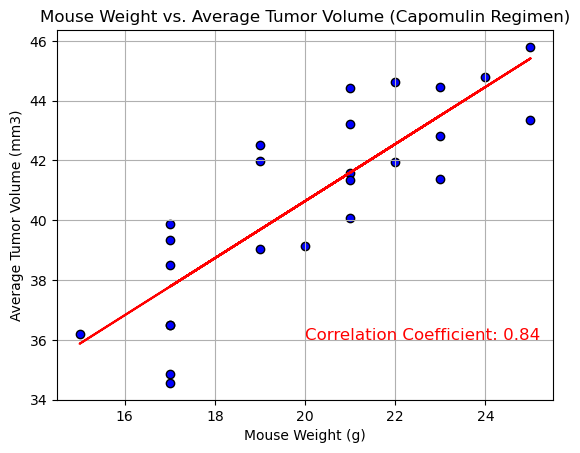

In [66]:
# Print the correlation coefficient
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Generate a scatter plot with the regression line
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')
plt.plot(capomulin_data['Weight (g)'], regress_values, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
# Display the correlation coefficient on the plot
plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', (20,36), color='red', fontsize=12)

plt.grid(True)
plt.show()
